# INST354 - Final Project Notebook 

**Team 8**: Emily Baelis, Noah Ramey, Octavio Sanchez, Prince Okpoziakpo

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts

# Read the data

In [125]:
ds_salaries = pd.read_csv('data/ds_salaries.csv')
ds_salaries.dropna()
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [126]:
print(len(ds_salaries['job_title'].unique()))

93


In [127]:
ds_salaries['job_title'].value_counts()

def engineer_or_scientist(title):
    """returns true if job_title is "Data Engineer or "Data Scientist"""""
    if(title == 'Data Engineer' or title == 'Data Scientist'):
        return 0
    return 1
ds_salaries['job_title'] = ds_salaries['job_title'].apply(lambda x : engineer_or_scientist(x))

ds_salaries.head(10)
    

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,1,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,1,30000,USD,30000,US,100,US,S
2,2023,MI,CT,1,25500,USD,25500,US,100,US,S
3,2023,SE,FT,0,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,0,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,1,222200,USD,222200,US,0,US,L
6,2023,SE,FT,1,136000,USD,136000,US,0,US,L
7,2023,SE,FT,0,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,0,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,0,147100,USD,147100,US,0,US,M


In [128]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   int64 
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(5), object(6)
memory usage: 322.8+ KB


In [129]:
ds_salaries.shape

(3755, 11)

In [130]:
ds_salaries.company_size.value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

# Splitting the data into training and testing sets // encoding categorical variables

In [131]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

l_encode = LabelEncoder() # use to encode categorical variables 
scaler = StandardScaler() # use to normalize numerical variables 

df = ds_salaries.loc[:, ['job_title', 'remote_ratio','salary_in_usd','employee_residence','company_size']]

# Encode the categorical variables in the dataset
df['employee_residence'] = l_encode.fit_transform(df['employee_residence'].to_numpy())
df['company_size'] = l_encode.fit_transform(df['company_size'].to_numpy())

# Normalize the salary_in_usd
df['salary_in_usd'] = scaler.fit_transform(df['salary_in_usd'].to_numpy().reshape(-1, 1))

In [132]:
# Split the data into training and test sets 

X = df.drop(labels=["job_title"], axis=1) # select the features
y = (df['job_title']).values # select the target    

# split the data into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y, random_state=10) 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2816, 4), (2816,), (939, 4), (939,))

In [133]:
ds_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,1,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,1,30000,USD,30000,US,100,US,S
2,2023,MI,CT,1,25500,USD,25500,US,100,US,S
3,2023,SE,FT,0,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,0,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,0,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,1,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,0,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,1,100000,USD,100000,US,100,US,L


In [134]:
df

,job_title,remote_ratio,salary_in_usd,employee_residence,company_size
0,1,100,-0.820391,26,0
1,1,100,-1.706187,75,2
2,1,100,-1.777563,75,2
3,0,100,0.593676,11,1
4,0,100,-0.278686,11,1
...,...,...,...,...,...
3750,0,100,4.352762,75,0
3751,1,100,0.213009,75,0
3752,0,100,-0.516603,75,2
3753,1,100,-0.595909,75,0


# Training the model // scaling values

In [135]:
from sklearn.metrics import classification_report, confusion_matrix

model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred =  model.predict(X_test)

report = classification_report(y_test, y_pred, labels=np.unique(y_pred))
conf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_pred))
    

In [136]:
print(report)

              precision    recall  f1-score   support

           0       0.50      0.72      0.59       448
           1       0.56      0.33      0.42       491

    accuracy                           0.52       939
   macro avg       0.53      0.53      0.50       939
weighted avg       0.53      0.52      0.50       939



<h1>Building The Confusion Matrix</h1>

Text(0.5, 0.98, 'Plot of confusion matrix')

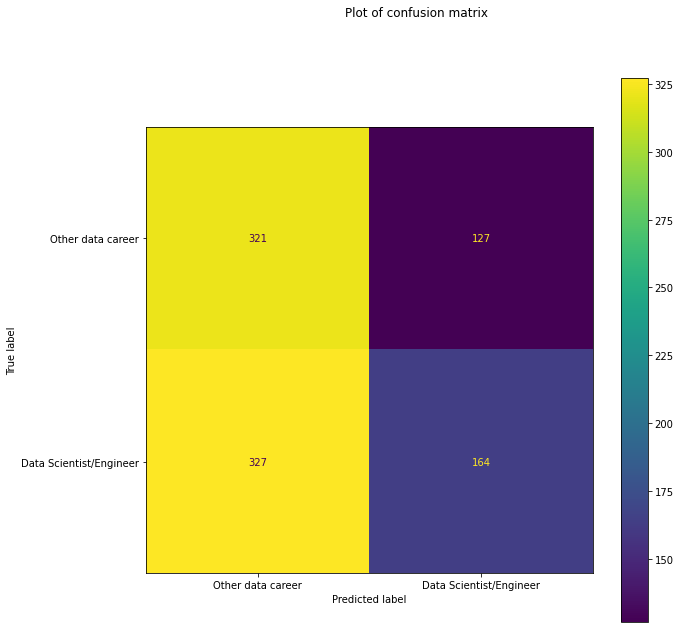

In [137]:
from sklearn.metrics import ConfusionMatrixDisplay
labels =  ['Other data career', 'Data Scientist/Engineer']
disp = ConfusionMatrixDisplay(conf_matrix,display_labels= labels ,)
disp.plot()

fig = disp.figure_
fig.colorbar
fig.set_figwidth(10)
fig.set_figheight(10) 
fig.suptitle('Plot of confusion matrix')


In [138]:
disp

# Splitting Data by Company Size

In [139]:
# 0: L, 1: M, 2: S
groups = [0, 1, 2]
ds_salaries_by_size = df[
    [
        "job_title", 
        "remote_ratio", 
        "salary_in_usd", 
        "employee_residence", 
        "company_size"
    ]
].groupby(by=["company_size"])

### Plotting the confusion matrix for each group

Group: 0 | (114, 4):
               precision    recall  f1-score   support

           0       1.00      0.04      0.08        46
           1       0.61      1.00      0.76        68

    accuracy                           0.61       114
   macro avg       0.80      0.52      0.42       114
weighted avg       0.77      0.61      0.48       114



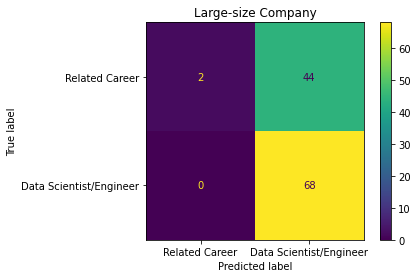

Group: 1 | (789, 4):
               precision    recall  f1-score   support

           0       0.55      0.85      0.66       422
           1       0.53      0.20      0.29       367

    accuracy                           0.54       789
   macro avg       0.54      0.52      0.48       789
weighted avg       0.54      0.54      0.49       789



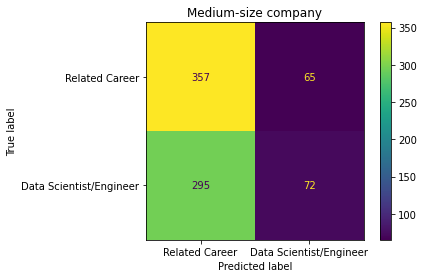

Group: 2 | (37, 4):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.76      1.00      0.86        28

    accuracy                           0.76        37
   macro avg       0.38      0.50      0.43        37
weighted avg       0.57      0.76      0.65        37



/Users/Omani/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Omani/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/Omani/Library/Python/3.8/lib/python/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


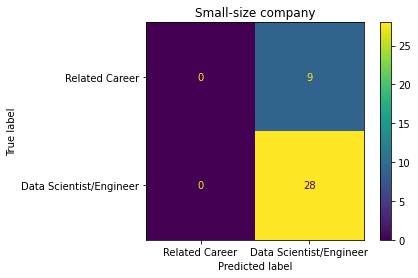

In [140]:
groupmap = {0: 'Large-size Company', 1: 'Medium-size company',2: 'Small-size company'}
for n, group in enumerate(groups): 
    g = ds_salaries_by_size.get_group(group)
    labels = g.job_title.unique()
    X = g.drop(labels=["job_title"], axis=1) # select the features
    y = (g['job_title']).values # select the target    

    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = tts(X, y, random_state=10) 
    X_train.shape, y_train.shape, X_test.shape, y_test.shape

    model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    y_pred =  model.predict(X_test)

    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(conf_matrix,display_labels=['Related Career','Data Scientist/Engineer'])
    
    print(f"Group: {group} | {X_test.shape}:\n {report}")
    disp.plot()
    plt.title(f'{groupmap[group]}')
    plt.show()